In [2]:
#Descarga de las diferentes librerías.
#Pandas
import pandas as pd
#matplotlib
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
from matplotlib import cbook
import matplotlib.font_manager as fm
#numpy
import numpy as np 
#seaborn
import seaborn as sns 
#bioinfokit
from bioinfokit.analys import stat 

In [3]:
#A continuación se realizará el llamado a los archivos de excel como "dataframes" en horizontal
df = pd.read_excel('C:/Users/maryp/Documents/PG23015/Datos.xlsx')
#Base de datos en vertical (hoja)
dfv = pd.read_excel('C:/Users/maryp/Documents/PG23015/DatosV.xlsx')
#Base de datos en vertical (tallo)
dfv2 = pd.read_excel('C:/Users/maryp/Documents/PG23015/DatosV2.xlsx')
#Base de datos de rendimientos del AE de Saragundí (Hoja)
dfaeh = pd.read_excel('C:/Users/maryp/Documents/PG23015/RendimientoAEHOJA.xlsx')
#Base de datos de rendimientos del AE de Saragundí (Tallo)
dfaet = pd.read_excel('C:/Users/maryp/Documents/PG23015/DatosAETALLO.xlsx')

In [4]:
#Limpiar la base de datos
#DF de hojas horizontal
df= df.dropna()
print (df.describe())
#DF de tallo horizontal
dfT= dfaet.dropna() # me permite borrar valores vacios
print (dfT.describe())
#DF de hojas vertical.
dfv= dfv.dropna()
print (dfv.describe())
#DF de tallo vertical.
dfv2= dfv2.dropna() 
print (dfv2.describe())

             Hora      T1R1      T1R2      T1R4      T1R5      T1R6      T1R7  \
count    6.000000  6.000000  6.000000  6.000000  6.000000  6.000000  6.000000   
mean   120.000000  1.358333  1.191667  1.133333  1.175000  1.266667  1.166667   
std     89.799777  0.382644  0.159426  0.081650  0.191703  0.287518  0.136626   
min      0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
25%     60.000000  1.100000  1.100000  1.100000  1.100000  1.100000  1.100000   
50%    120.000000  1.200000  1.175000  1.150000  1.125000  1.200000  1.150000   
75%    180.000000  1.600000  1.250000  1.200000  1.150000  1.300000  1.200000   
max    240.000000  1.950000  1.450000  1.200000  1.550000  1.800000  1.400000   

           T1R8      T1R9     T1R11  ...     T6R19     T6R20     T6R21  \
count  6.000000  6.000000  6.000000  ...  6.000000  6.000000  6.000000   
mean   1.208333  1.166667  1.283333  ...  4.675000  4.058333  4.491667   
std    0.180046  0.136626  0.242212  ...  2.8179

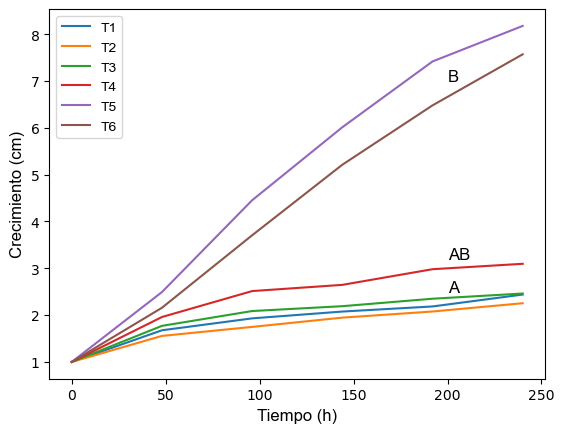

In [5]:
# Obtener los nombres de las columnas de tratamiento
columnas = df.columns[1:]

# Crear un diccionario para almacenar los datos agrupados por tratamiento
tratamientos = {}

# Agrupar las columnas por tratamiento
for columna in columnas:
    tratamiento = columna.split('R')[0]  # Obtener el nombre del tratamiento
    if tratamiento in tratamientos:
        tratamientos[tratamiento].append(columna)
    else:
        tratamientos[tratamiento] = [columna]

# Calcular el promedio de las repeticiones para cada tratamiento
df_promedio = pd.DataFrame()
for tratamiento, repeticiones in tratamientos.items():
    df_promedio[tratamiento] = df[repeticiones].mean(axis=1)

# Agregar la columna de tiempo al DataFrame promedio
df_promedio['Hora'] = df['Hora']

# Crear la gráfica de líneas para el promedio de cada tratamiento
for tratamiento in tratamientos:
    plt.plot(df_promedio['Hora'], df_promedio[tratamiento], label=tratamiento)

# Personalizar el gráfico
afont = {'fontname':'Arial'}
bfont = fm.FontProperties(family='Arial')
plt.xlabel('Tiempo (h)',**afont, size=12)
plt.ylabel('Crecimiento (cm)',**afont, size=12)
plt.title('')
plt.legend(prop=bfont)
plt.annotate('A', ([200,2.5]),**afont, size=12)
plt.annotate('AB', ([200,3.2]),**afont, size=12)
plt.annotate('B', ([200,7]),**afont, size=12)

# Mostrar la gráfica
plt.show()

In [6]:
print(df_promedio)

         T1        T2        T3        T4        T5        T6  Hora
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000     0
1  1.676087  1.555769  1.770370  1.959615  2.492593  2.157143    48
2  1.930435  1.748077  2.087037  2.513462  4.453704  3.705357    96
3  2.076087  1.946154  2.190741  2.646154  6.012963  5.212500   144
4  2.184783  2.076923  2.350000  2.980769  7.418519  6.480357   192
5  2.439130  2.253846  2.461111  3.096154  8.177778  7.571429   240


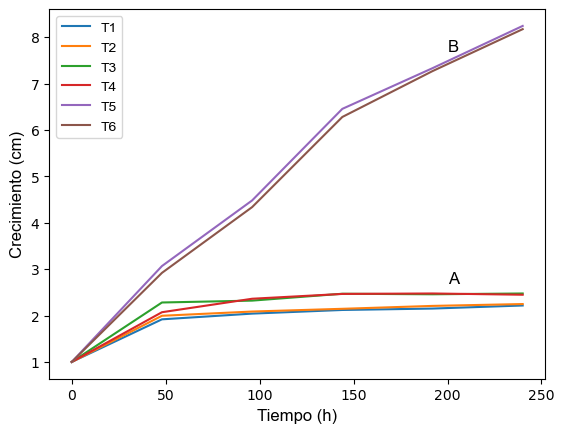

In [7]:
# Obtener los nombres de las columnas de tratamiento
columnas = dfT.columns[1:]

# Crear un diccionario para almacenar los datos agrupados por tratamiento
tratamientos = {}

# Agrupar las columnas por tratamiento
for columna in columnas:
    tratamiento = columna.split('R')[0]  # Obtener el nombre del tratamiento
    if tratamiento in tratamientos:
        tratamientos[tratamiento].append(columna)
    else:
        tratamientos[tratamiento] = [columna]

# Calcular el promedio de las repeticiones para cada tratamiento
df_promedio = pd.DataFrame()
for tratamiento, repeticiones in tratamientos.items():
    df_promedio[tratamiento] = dfT[repeticiones].mean(axis=1)

# Agregar la columna de tiempo al DataFrame promedio
df_promedio['Hora'] = dfT['Hora']

# Crear la gráfica de líneas para el promedio de cada tratamiento
for tratamiento in tratamientos:
    plt.plot(df_promedio['Hora'], df_promedio[tratamiento], label=tratamiento)

# Personalizar el gráfico
afont = {'fontname':'Arial'}
bfont = fm.FontProperties(family='Arial')
plt.xlabel('Tiempo (h)',**afont, size=12)
plt.ylabel('Crecimiento (cm)',**afont, size=12)
plt.title('')
plt.legend(prop=bfont)
plt.annotate('A', ([200,2.7]),**afont, size=12)
plt.annotate('B', ([200,7.7]),**afont, size=12)

# Mostrar la gráfica
plt.show()

In [8]:
print(df_promedio)

         T1        T2        T3        T4        T5        T6  Hora
0  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000     0
1  1.917857  1.994643  2.280769  2.071154  3.066071  2.919231    48
2  2.041071  2.085714  2.321154  2.361538  4.480357  4.336538    96
3  2.119643  2.144643  2.469231  2.465385  6.453571  6.278846   144
4  2.150000  2.207143  2.457692  2.475000  7.330357  7.267308   192
5  2.216071  2.247321  2.475000  2.448077  8.241071  8.171154   240


In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Realizar el análisis de varianza (ANOVA)
model = ols('Hora240 ~ C(Tratamiento)', data=dfv).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimir la tabla ANOVA
print("Tabla ANOVA:")
print(anova_table)

# Realizar el Test Tukey HSD para la comparación entre tratamientos
res = stat()
res.tukey_hsd(df=dfv, res_var='Hora240', xfac_var='Tratamiento', anova_model='Hora240 ~ C(Tratamiento)')

# Función para obtener la letra de grupo de acuerdo al orden de significancia (p-value)
def get_letra_grupo(p_value):
    letras_grupo = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    if p_value < 0.001:
        return letras_grupo[0]
    elif p_value < 0.01:
        return letras_grupo[1]
    elif p_value < 0.05:
        return letras_grupo[2]
    else:
        return letras_grupo[3]

# Agregar una columna con la letra de grupo correspondiente
tukey_summary = res.tukey_summary.copy()
tukey_summary['Grupo'] = tukey_summary['p-value'].apply(get_letra_grupo)

print("\nResumen de Tukey HSD:")
print(tukey_summary.round(3))
print("Cantidad de Grupos:", tukey_summary['Grupo'].nunique())

Tabla ANOVA:
                     sum_sq     df           F        PR(>F)
C(Tratamiento)  1024.249509    5.0  293.863294  6.746753e-76
Residual         105.260969  151.0         NaN           NaN

Resumen de Tukey HSD:
   group1 group2   Diff  Lower  Upper  q-value  p-value Grupo
0      T1     T2  0.188 -0.502  0.877    1.110    0.900     D
1      T1     T3  0.002 -0.681  0.686    0.014    0.900     D
2      T1     T4  0.672 -0.018  1.362    3.977    0.061     D
3      T1     T5  5.752  5.069  6.436   34.338    0.001     B
4      T1     T6  5.129  4.451  5.807   30.871    0.001     B
5      T2     T3  0.190 -0.472  0.852    1.171    0.900     D
6      T2     T4  0.860  0.191  1.528    5.250    0.004     B
7      T2     T5  5.940  5.278  6.602   36.617    0.001     B
8      T2     T6  5.316  4.660  5.973   33.064    0.001     B
9      T3     T4  0.670  0.007  1.332    4.128    0.046     C
10     T3     T5  5.750  5.094  6.406   35.785    0.001     B
11     T3     T6  5.126  4.476  5.776

c:\Users\maryp\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [10]:
#Agrupar los datos por tratamiento
grouped_data = dfv.groupby('Tratamiento')

#Calcular la desviación estándar para cada grupo y hora
std_deviation_by_hour = grouped_data.agg({'Hora0': 'std', 'Hora48': 'std', 'Hora96': 'std', 'Hora144': 'std', 'Hora192': 'std', 'Hora240': 'std'})

#Desviación estándar para cada tratamiento a todas las horas.
print(std_deviation_by_hour)

             Hora0    Hora48    Hora96   Hora144   Hora192   Hora240
Tratamiento                                                         
T1             0.0  0.680560  0.968802  0.977231  1.017733  1.160980
T2             0.0  0.495115  0.657384  0.766884  0.769445  0.753283
T3             0.0  0.474462  0.619335  0.703294  0.723108  0.627623
T4             0.0  0.353053  0.616432  0.861227  0.891265  0.892645
T5             0.0  0.272349  0.474191  0.549754  0.638380  0.442531
T6             0.0  0.311019  0.565788  0.736651  0.922249  0.984474


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Realizar el análisis de varianza (ANOVA)
model = ols('Hora240 ~ C(Tratamiento)', data=dfv2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Imprimir la tabla ANOVA
print("Tabla ANOVA:")
print(anova_table)

# Realizar el Test Tukey HSD para la comparación entre tratamientos
res = stat()
res.tukey_hsd(df=dfv, res_var='Hora240', xfac_var='Tratamiento', anova_model='Hora240 ~ C(Tratamiento)')

# Función para obtener la letra de grupo de acuerdo al orden de significancia (p-value)
def get_letra_grupo(p_value):
    letras_grupo = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    if p_value < 0.001:
        return letras_grupo[0]
    elif p_value < 0.01:
        return letras_grupo[1]
    elif p_value < 0.05:
        return letras_grupo[2]
    else:
        return letras_grupo[3]

# Agregar una columna con la letra de grupo correspondiente
tukey_summary = res.tukey_summary.copy()
tukey_summary['Grupo'] = tukey_summary['p-value'].apply(get_letra_grupo)

print("\nResumen de Tukey HSD:")
print(tukey_summary.round(3))
print("Cantidad de Grupos:", tukey_summary['Grupo'].nunique())

Tabla ANOVA:
                     sum_sq     df            F         PR(>F)
C(Tratamiento)  1239.869031    5.0  1890.203189  1.368180e-137
Residual          20.465479  156.0          NaN            NaN

Resumen de Tukey HSD:
   group1 group2   Diff  Lower  Upper  q-value  p-value Grupo
0      T1     T2  0.188 -0.502  0.877    1.110    0.900     D
1      T1     T3  0.002 -0.681  0.686    0.014    0.900     D
2      T1     T4  0.672 -0.018  1.362    3.977    0.061     D
3      T1     T5  5.752  5.069  6.436   34.338    0.001     B
4      T1     T6  5.129  4.451  5.807   30.871    0.001     B
5      T2     T3  0.190 -0.472  0.852    1.171    0.900     D
6      T2     T4  0.860  0.191  1.528    5.250    0.004     B
7      T2     T5  5.940  5.278  6.602   36.617    0.001     B
8      T2     T6  5.316  4.660  5.973   33.064    0.001     B
9      T3     T4  0.670  0.007  1.332    4.128    0.046     C
10     T3     T5  5.750  5.094  6.406   35.785    0.001     B
11     T3     T6  5.126  4.476 

c:\Users\maryp\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


In [12]:
#Agrupar los datos por tratamiento
grouped_data = dfv2.groupby('Tratamiento')

#Calcular la desviación estándar para cada grupo y hora
std_deviation_by_hour = grouped_data.agg({'Hora0': 'std', 'Hora48': 'std', 'Hora96': 'std', 'Hora144': 'std', 'Hora192': 'std', 'Hora240': 'std'})

#Desviación estándar para cada tratamiento a todas las horas.
print(std_deviation_by_hour)

             Hora0    Hora48    Hora96   Hora144   Hora192   Hora240
Tratamiento                                                         
T1             0.0  0.375207  0.316828  0.369519  0.383213  0.385154
T2             0.0  0.188237  0.145206  0.165182  0.203995  0.248359
T3             0.0  0.173826  0.272093  0.271690  0.213397  0.250300
T4             0.0  0.306977  0.178498  0.153473  0.174499  0.210467
T5             0.0  0.509548  0.280654  0.350378  0.427599  0.536458
T6             0.0  0.681920  0.341631  0.484184  0.423070  0.417175


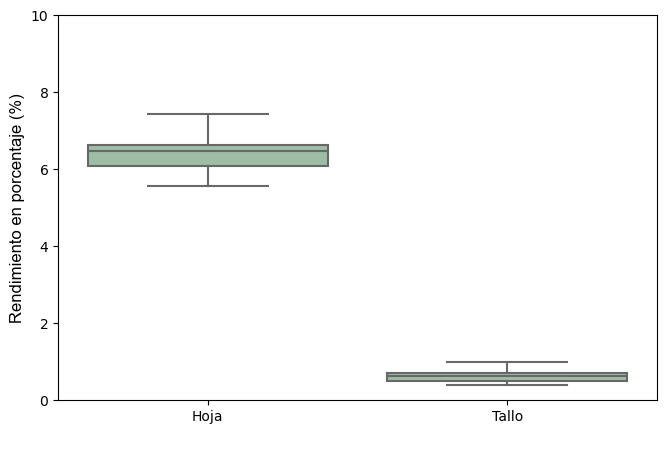

In [13]:
afont = {'fontname':'Arial'}

fig = plt.figure(figsize=(17,5))

plot1 = fig.add_subplot(121)

A = sns.boxplot(x='M', y='Rendimientos', data=dfaeh, color='#99c2a2')

plt.xlabel(' ',**afont,size=12)

plt.ylabel('Rendimiento en porcentaje (%)',**afont,size=12)

plt.ylim(0,10)

plt.grid(False)

In [14]:
data = df

# Lista de tratamientos y testigo absoluto
tratamientos = ['T1', 'T2', 'T3', 'T4']
testigo_absoluto = 'T5'

# Lista de momentos en el tiempo
horas = [0, 48, 96, 144, 192, 240]

for tratamiento in tratamientos:
    for hora in horas:
        tratamiento_columnas = [f'{tratamiento}R{i}' for i in range(1, 29) if f'{tratamiento}R{i}' in data.columns]  # Columnas de un tratamiento específico que existen
        promedio_hora = data[tratamiento_columnas].mean(axis=1)  # Calcula el promedio para la hora específica y el tratamiento
        columna_c = f'{testigo_absoluto}R1'  # Suponiendo que se usa T5 como testigo absoluto
        data[f'Porcentaje de Inhibición_{tratamiento}_{hora}h'] = ((data[columna_c] - promedio_hora) / data[columna_c]) * 100

# Muestra o guarda los resultados
data.to_excel('resultados.xlsx', index=False)

# Si solo deseas mostrar los resultados en la consola, puedes omitir la línea de guardar en Excel
print(data)

   Hora  T1R1  T1R2  T1R4  T1R5  T1R6  T1R7  T1R8  T1R9  T1R11  ...  \
0     0  1.00  1.00   1.0  1.00   1.0   1.0  1.00   1.0   1.00  ...   
1    48  1.10  1.10   1.1  1.10   1.1   1.1  1.10   1.1   1.10  ...   
2    96  1.10  1.10   1.1  1.10   1.1   1.1  1.10   1.1   1.10  ...   
3   144  1.30  1.25   1.2  1.15   1.3   1.2  1.20   1.2   1.45  ...   
4   192  1.70  1.25   1.2  1.15   1.3   1.2  1.40   1.2   1.50  ...   
5   240  1.95  1.45   1.2  1.55   1.8   1.4  1.45   1.4   1.55  ...   

   Porcentaje de Inhibición_T3_96h  Porcentaje de Inhibición_T3_144h  \
0                         0.000000                          0.000000   
1                        34.430727                         34.430727   
2                        51.464255                         51.464255   
3                        62.868801                         62.868801   
4                        68.666667                         68.666667   
5                        69.986450                         69.986450  

In [15]:
data = dfaet

# Lista de tratamientos y testigo absoluto
tratamientos = ['T1', 'T2', 'T3', 'T4']
testigo_absoluto = 'T5'

# Lista de momentos en el tiempo
horas = [0, 48, 96, 144, 192, 240]

for tratamiento in tratamientos:
    for hora in horas:
        tratamiento_columnas = [f'{tratamiento}R{i}' for i in range(1, 29) if f'{tratamiento}R{i}' in data.columns]  # Columnas de un tratamiento específico que existen
        promedio_hora = data[tratamiento_columnas].mean(axis=1)  # Calcula el promedio para la hora específica y el tratamiento
        columna_c = f'{testigo_absoluto}R1'  # Suponiendo que se usa T5 como testigo absoluto
        data[f'Porcentaje de Inhibición_{tratamiento}_{hora}h'] = ((data[columna_c] - promedio_hora) / data[columna_c]) * 100

# Muestra o guarda los resultados
data.to_excel('resultados2.xlsx', index=False)

# Si solo deseas mostrar los resultados en la consola, puedes omitir la línea de guardar en Excel
print(data)

   Hora  T1R1  T1R2  T1R3  T1R4  T1R5  T1R6  T1R7  T1R8  T1R9  ...  \
0     0  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00  ...   
1    48  1.20  1.30  1.55  1.45  1.60  1.60  1.50  1.75  1.80  ...   
2    96  1.65  1.70  1.65  1.60  1.70  1.55  1.95  1.85  2.00  ...   
3   144  1.80  1.70  1.70  1.85  1.70  1.60  1.95  2.00  2.00  ...   
4   192  1.70  1.75  1.70  2.00  1.85  1.85  1.95  1.90  2.05  ...   
5   240  1.85  2.00  1.90  1.95  1.75  1.90  2.05  2.25  2.05  ...   

   Porcentaje de Inhibición_T3_96h  Porcentaje de Inhibición_T3_144h  \
0                         0.000000                          0.000000   
1                        18.543956                         18.543956   
2                        48.418803                         48.418803   
3                        63.418803                         63.418803   
4                        64.381271                         64.381271   
5                        70.882353                         70.882353   

   P